# 2.2 Key statistics

In [441]:
%load_ext autoreload
%autoreload 2

# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import zipfile
from pathlib import Path
import os
import sys
from IPython.display import display

# specfic soccer analysis packages
from mplsoccer import Pitch, Sbopen, VerticalPitch

# load custom functions
from src.visualization import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Denmark vs Slovenia 2:1 (2023-11-20)

In [442]:
match_id = "5414302"
df_events = pd.read_csv(f"./results/wyscout/{match_id}_df_events.csv", index_col=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


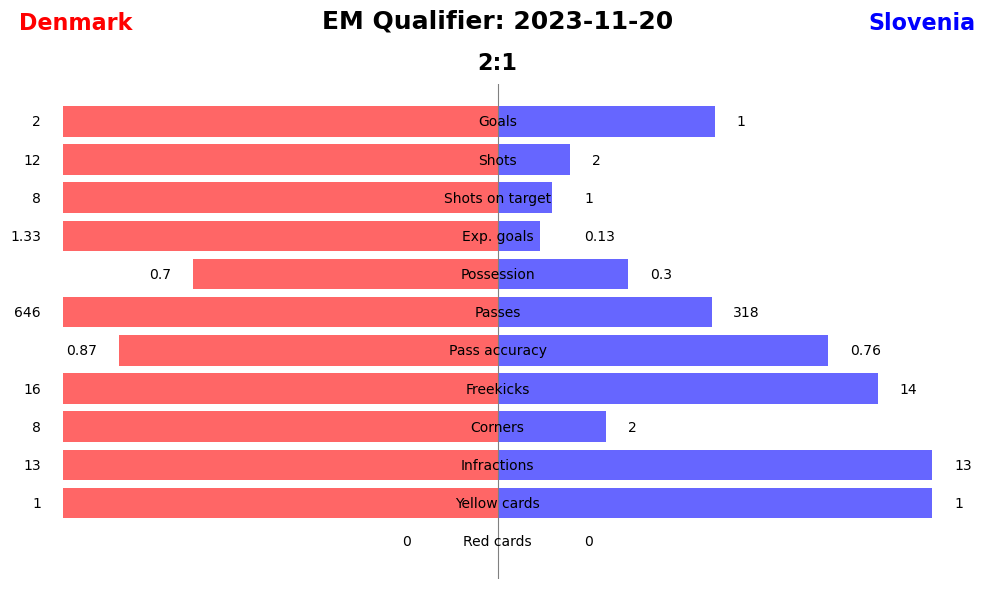

In [452]:
# Display game statistics, such as the number of shots, passes, etc. per team
team_type_counts = df_events.groupby(['team.name', 'type.primary']).size().unstack(fill_value=0)
shots_dnk = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Denmark")]
shots_svn = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Slovenia")]
passes_completed = df_events[df_events["type.primary"] == "pass"].groupby(['team.name'])['pass.accurate'].sum()
possession = df_events.groupby("team.name")["possession.duration"].sum() / df_events["possession.duration"].sum()

team2 = 'Denmark'
dnk_data = {'Goals': shots_dnk['shot.isGoal'].sum(),
            'Shots': shots_dnk.shape[0],
            'Shots on target': shots_dnk['shot.onTarget'].sum(),
            'Exp. goals': shots_dnk['shot.xg'].sum().round(2),
            'Possession': (possession.loc[team2]).round(2), # in percent
            'Passes': team_type_counts.loc[team2, 'pass'],
            'Pass accuracy': (passes_completed.loc[team2] / team_type_counts.loc[team2, 'pass']).round(2),
            'Freekicks': team_type_counts.loc[team2, 'free_kick'],
            'Corners': team_type_counts.loc[team2, 'corner'],
            'Infractions': team_type_counts.loc[team2, 'infraction'],
            'Yellow cards': df_events[(df_events["team.name"] == team2) & (df_events["infraction.yellowCard"] == True)].shape[0],
            'Red cards': df_events[(df_events["team.name"] == team2) & (df_events["infraction.redCard"] == True)].shape[0],
            }

team1 = 'Slovenia'
svn_data = {'Goals': shots_svn['shot.isGoal'].sum(),
            'Shots': shots_svn.shape[0],
            'Shots on target': shots_svn['shot.onTarget'].sum(),
            'Exp. goals': shots_svn['shot.xg'].sum().round(2),
            'Possession': (possession.loc[team1]).round(2), # in percent
            'Passes': team_type_counts.loc[team1, 'pass'],
            'Pass accuracy': (passes_completed.loc[team1] / team_type_counts.loc[team1, 'pass']).round(2),
            'Freekicks': team_type_counts.loc[team1, 'free_kick'],
            'Corners': team_type_counts.loc[team1, 'corner'],
            'Infractions': team_type_counts.loc[team1, 'infraction'],
            'Yellow cards': df_events[(df_events["team.name"] == team1) & (df_events["infraction.yellowCard"] == True)].shape[0],
            'Red cards': df_events[(df_events["team.name"] == team1) & (df_events["infraction.redCard"] == True)].shape[0],
            }

# if category % do not normalize
perc_categories = ['Possession', 'Pass accuracy']

plot_stats_barchart(svn_data, dnk_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='2:1', team1_color='blue', team2_color='red', saveplt=True, savepath='plots/2-statistics/key_statistics.png')


